# Capstone Project

## Imports, load the dataframe.

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("profiles.csv")

## Explore the data

In [2]:
df.job.head()

0                 transportation
1           hospitality / travel
2                            NaN
3                        student
4    artistic / musical / writer
Name: job, dtype: object

In [12]:
pd.set_option('display.max_columns', None)  
pd.set_option('display.max_colwidth', 200)
df.head(10)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"about me:<br />\n<br />\ni would love to think that i was some some kind of intellectual:\neither the dumbest smart guy, or the smartest dumb guy. can't say i\ncan tell the difference. i love to t...","currently working as an international agent for a freight\nforwarding company. import, export, domestic you know the\nworks.<br />\nonline classes and trying to better myself in my free time. perh...","making people laugh.<br />\nranting about a good salting.<br />\nfinding simplicity in complexity, and complexity in simplicity.","the way i look. i am a six foot half asian, half caucasian mutt. it\nmakes it tough not to notice me, and for me to blend in.","books:<br />\nabsurdistan, the republic, of mice and men (only book that made me\nwant to cry), catcher in the rye, the prince.<br />\n<br />\nmovies:<br />\ngladiator, operation valkyrie, the pro...",food.<br />\nwater.<br />\ncell phone.<br />\nshelter.,duality and humorous things,trying to find someone to hang out with. i am down for anything\nexcept a club.,i am new to california and looking for someone to wisper my secrets\nto.,you want to be swept off your feet!<br />\nyou are tired of the norm.<br />\nyou want to catch a coffee or a bite.<br />\nor if you want to talk philosophy.,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1. i am a workaholic.<br />\n2. i love to cook regardless of whether i am at work.<br />\n3. i love to drink and eat foods that are probably really bad...,dedicating everyday to being an unbelievable badass.,being silly. having ridiculous amonts of fun wherever. being a\nsmart ass. ohh and i can cook. ;),NaN,i am die hard christopher moore fan. i don't really watch a lot of\ntv unless there is humor involved. i am kind of stuck on 90's\nalternative music. i am pretty much a fan of everything though......,delicious porkness in all of its glories.<br />\nmy big ass doughboy's sinking into 15 new inches.<br />\nmy overly resilient liver.<br />\na good sharp knife.<br />\nmy ps3... it plays blurays to...,NaN,NaN,i am very open and will share just about anything.,NaN,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (poorly)",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public text on an online\ndating site makes me pleasantly uncomfortable. i'll try to be as\nearnest as possible in the noble endeavor of standing naked before\...","i make nerdy software for musicians, artists, and experimenters to\nindulge in their own weirdness, but i like to spend time away from\nthe computer when working on my artwork (which is typically ...","improvising in different contexts. alternating between being\npresent and decidedly outside of a moment, or trying to hold both\nat once. rambling intellectual conversations that hold said\nconver...","my large jaw and large glasses are the physical things people\ncomment on the most. when sufficiently stimulated, i have an\nunmistakable cackle of a laugh. after that, it goes in more\ndirections...","okay this is where the cultural matrix gets so specific, it's like\nbeing in the crosshairs.<br />\n<br />\nfor what it's worth, i find myself reading more non

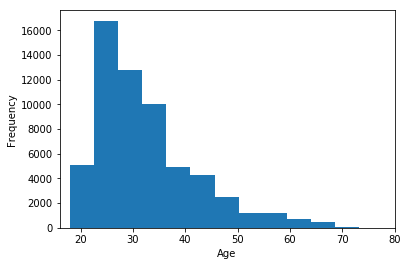

In [8]:
from matplotlib import pyplot as plt
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()

In [58]:
# TODO: decide if we want to do anything with this
def get_label_mapping_for_column(col_name):
    mappings = {
        "drinks": {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desparately": 5}
    }
    return mappings[col_name]


# Question
Given the essays, can any demographics be predicted accurately?

## Essays:
* essay0 - My self summary
* essay1 - What I’m doing with my life
* essay2 - I’m really good at
* essay3 - The first thing people usually notice about me
* essay4 - Favorite books, movies, show, music, and food
* essay5 - The six things I could never do without
* essay6 - I spend a lot of time thinking about
* essay7 - On a typical Friday night I am
* essay8 - The most private thing I am willing to admit
* essay9 - You should message me if... 


## Demographics:
 1. age
 2. body_type
 3. diet
 4. drinks
 5. drugs
 6. education
 7. ethnicity
 8. height
 9. job
 10. orientation
 11. pets
 12. religion
 13. sex
 14. sign
 15. smokes
 16. speaks
 17. status

# Approach
1. Identify a demographic we want to predict with essay text.
2. Concatenate the essay columns together
3. Make a word list / labels.
4. Use scikit_learn train_test_split
5. Evaluate the accuracy / precision / recall.


## Prediction
Let's see if we can predict a user's sex with their essays.

In [150]:
import re
import datetime

def filter_essay_text(text):
    # replace html entities and newlines with space
    filtered_text = re.sub(r'<br />\n|\n|&amp;|&quot;', ' ', text)
    # eliminate non-word characters
    filtered_text = re.sub(r'[^\w^ ]', '', filtered_text)
    return filtered_text

def get_essays_word_list(essays):
    word_list = []
    for essay in essays:
        if (type(essay) == str):
            word_list += filter_essay_text(essay).split()
    return word_list

def get_concatenated_and_filtered_essays(essays, word_combination_level=1):
    concatenated_text = ''
    word_list = get_essays_word_list(essays)
    word_list_len = len(word_list)
    for i in range(0, word_list_len):
        if ((i + word_combination_level) < word_list_len):
            for j in range(0, word_combination_level):
                concatenated_text += word_list[i+j]
            concatenated_text += ' '
    # remove the extra space from the end of the string
    concatenated_text = concatenated_text[:-1]
    return concatenated_text

def get_concatenated_and_filtered_essays_from_row(row, word_combination_level=1):
    essays = []
    for i in range(0, 10):
        key = 'essay' + str(i)
        essays.append(row[key])
    return get_concatenated_and_filtered_essays(essays, word_combination_level)


In [52]:

essay_cols = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']
demographics = ['sex']
all_essays = {}
all_essays_labels = {}

for demographic in demographics:
    all_essays[demographic] = []
    all_essays_labels[demographic] = []
    demog_values = df[demographic].unique()
    i = 0
    for demog_value in demog_values:
        essays_list = df[df[demographic] == demog_value][essay_cols].values
        for essays in essays_list:
            essay = get_concatenated_and_filtered_essays(essays)
            all_essays[demographic].append(essay)
            all_essays_labels[demographic].append(i)
        i += 1
    #print(len(all_essays))
    #print(len(all_essays_labels))
    #print(all_essays[0])
    #print(all_essays_labels[0])
    #print(all_essays[len(all_essays_labels)-1])
    #print(all_essays_labels[len(all_essays_labels)-1])

#[rint(all_essays['sex'][0])
print(all_essays_labels['sex'][0])
print(all_essays['sex'][len(all_essays_labels['sex'])-1])
print(all_essays_labels['sex'][len(all_essays_labels['sex'])-1])


In [89]:
# New pandas column with text for all essays concatenated, special characters removed.
df['filtered_essays'] = df.apply(lambda row: get_concatenated_and_filtered_essays_from_row(row), axis=1)
#df['filtered_essays_lvl2'] = df.apply(lambda row: get_concatenated_and_filtered_essays_from_row(row, 2), axis=1)
#df['filtered_essays_lvl3'] = df.apply(lambda row: get_concatenated_and_filtered_essays_from_row(row, 3), axis=1)

In [96]:
print(df['filtered_essays'].values[0])
print(df['filtered_essays_lvl2'].values[0])
print(df['filtered_essays_lvl3'].values[0])

about me i would love to think that i was some some kind of intellectual either the dumbest smart guy or the smartest dumb guy cant say i can tell the difference i love to talk about ideas and concepts i forge odd metaphors instead of reciting cliches like the simularities between a friend of mines house and an underwater salt mine my favorite word is salt by the way weird choice i know to me most things in life are better as metaphors i seek to make myself a little better everyday in some productively lazy way got tired of tying my shoes considered hiring a five year old but would probably have to tie both of our shoes decided to only wear leather shoes dress shoes about you you love to have really serious really deep conversations about really silly stuff you have to be willing to snap me out of a light hearted rant with a kiss you dont have to be funny but you have to be able to make me laugh you should be able to bend spoons with your mind and telepathically make me smile while i a

In [122]:
df['sex_int'] = df.apply(lambda row: 0 if row['sex'] == 'm' else 1, axis=1)

## Visualize the data: Number of males vs females

[35829, 24117]


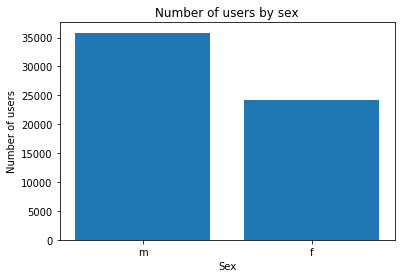

In [148]:
from matplotlib import pyplot as plt
column = 'sex_int'
x_vals = df[column].unique().tolist()
plt.xticks(x_vals, df['sex'].unique().tolist())
plt.xlabel("Sex")
plt.ylabel("Number of users")
plt.title("Number of users by sex")
y_vals = []
for x_val in x_vals:
    vals_num = len(df[df[column] == x_val])
    y_vals.append(vals_num)

plt.bar(x_vals, y_vals, align="center")
print(y_vals)



### Split into training and testing sets

In [202]:
# This random_state variable is reused for the various scikit_learn model constructors.
random_state = 50

from sklearn.model_selection import train_test_split
demog = demographics[0]
#train_data, test_data, train_labels, test_labels = train_test_split(df['filtered_essays'], df[demog], test_size=0.2, random_state=random_state)
train_data, test_data, train_labels, test_labels = train_test_split(df['filtered_essays'], df['sex_int'], test_size=0.2, random_state=random_state)
#train_data, test_data, train_labels, test_labels = train_test_split(df['filtered_essays_lvl2'], df['sex_int'], test_size=0.2, random_state=random_state)
#train_data, test_data, train_labels, test_labels = train_test_split(df['filtered_essays_lvl3'], df['sex_int'], test_size=0.2, random_state=random_state)
print(len(train_data))
print(len(test_data))

47956
11990


### Make count vectors

In [203]:
from sklearn.feature_extraction.text import CountVectorizer
counter = CountVectorizer()
print(datetime.datetime.now())
counter.fit(train_data)
train_counts = counter.transform(train_data)
test_counts = counter.transform(test_data)
print(datetime.datetime.now())
#print(train_data[0])
#print(train_counts[0])

2018-12-16 18:30:24.415089
2018-12-16 18:31:09.545781


## Dataset Exploration:
What are the most frequently used words for males? What are the most frequently used words for females?

In [230]:
import operator
#sorted_d = sorted(counter.vocabulary_.items(), key=operator.itemgetter(0), reverse=True)
#counter.vocabulary_.items()

def print_most_frequently_used_words(train_data, n=20):
    counter = CountVectorizer()
    cv_fit = counter.fit_transform(train_data)
    feature_names = counter.get_feature_names()
    feature_counts = np.asarray(cv_fit.sum(axis=0))
    #largest_n_indexes = np.argpartition(feature_counts[0], -n)[-n:]
    largest_n_indexes = np.argpartition(feature_counts[0], -n)[-n:]
    frequent_words = {}
    for i in largest_n_indexes:
        frequent_words[feature_names[i]] = feature_counts[0][i]
    sorted_frequent_words = sorted(frequent_words.items(), key=operator.itemgetter(1), reverse=True)
    x_vals = range(n)
    x_ticks = []
    y_vals = []
    for word in sorted_frequent_words:
        print(word[0],": ",word[1])
        x_ticks.append(word[0])
        y_vals.append(word[1])
    from matplotlib import pyplot as plt
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 9
    plt.rcParams["figure.figsize"] = fig_size
    plt.xticks(x_vals, x_ticks)
    plt.xlabel("Word")
    plt.ylabel("Times used")
    plt.title("Word Frequencies")
    plt.bar(x_vals, y_vals, align="center")

In [224]:
print_most_frequently_used_words(train_data, 20)

and :  574975
the :  504797
to :  479423
my :  289876
of :  287497
in :  238812
im :  167036
you :  151147
with :  142422
for :  138047
that :  135667
is :  120384
have :  113640
it :  111021
like :  108701
on :  105345
but :  104201
or :  103535
me :  102994
am :  95853
love :  95363
at :  93144
be :  80506
not :  79621
are :  73740
out :  73439
good :  71322
as :  70285
classilink :  70248
if :  66471
friends :  64824
music :  63525
people :  61343
about :  60630
life :  55449
can :  55399
all :  55225
time :  54842
just :  54294
so :  53978
things :  51511
do :  50655
what :  49053
food :  48365
an :  48295
this :  47829
dont :  46971
new :  46453
up :  45261
really :  43414


and :  405802
the :  376457
to :  349619
of :  214668
my :  196876
in :  173726
im :  123128
you :  111904
that :  102256
for :  100777
with :  99767
is :  88254
it :  83044
have :  81248
like :  80891
on :  77953
or :  75931
but :  75450
me :  72790
at :  68850


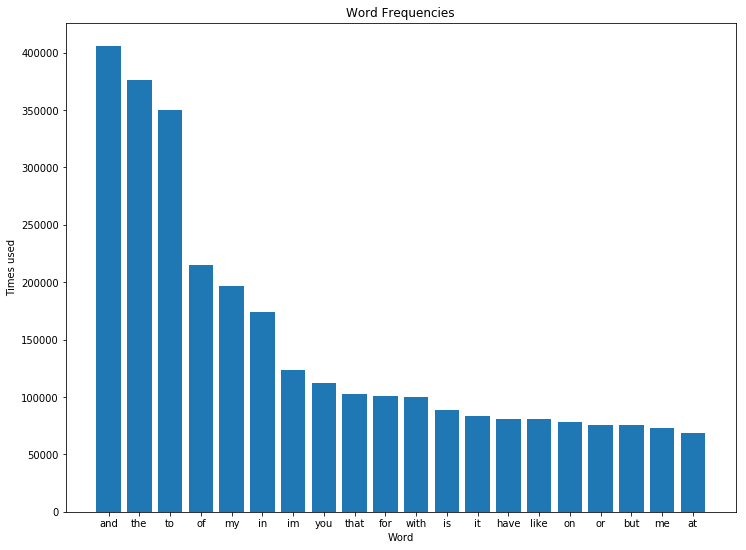

In [232]:
# male essays
print_most_frequently_used_words(df[df['sex'] == 'm']['filtered_essays'])

and :  309731
the :  250885
to :  246979
my :  164225
of :  142478
in :  123662
im :  84644
with :  77272
you :  76550
for :  70929
that :  65892
love :  61920
is :  61637
have :  60416
am :  56310
me :  55464
it :  55274
like :  54019
but :  53973
on :  52845


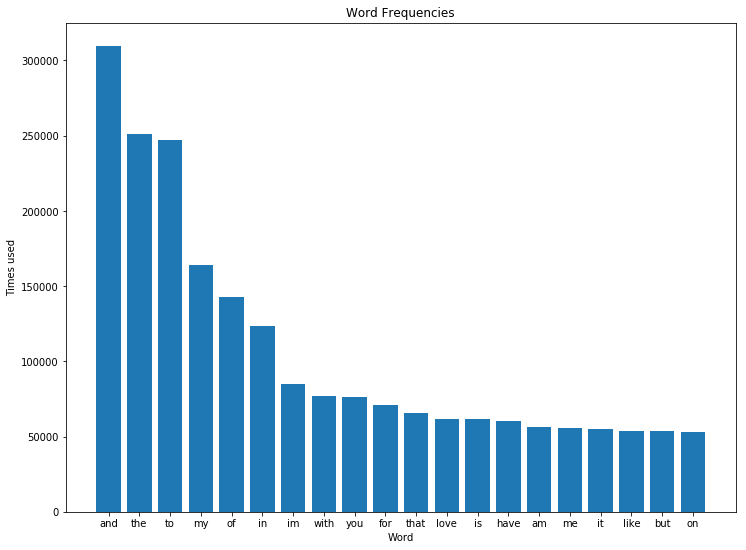

In [231]:
# female essays
print_most_frequently_used_words(df[df['sex'] == 'f']['filtered_essays'])

my :  24979
and :  17170
the :  15020
friends :  12887
to :  11446
family :  10326
of :  8668
music :  8660
food :  6732
good :  6344
in :  5310
it :  4662
that :  4520
love :  3724
water :  3406
with :  3190
internet :  3160
is :  2959
coffee :  2950
href :  2779


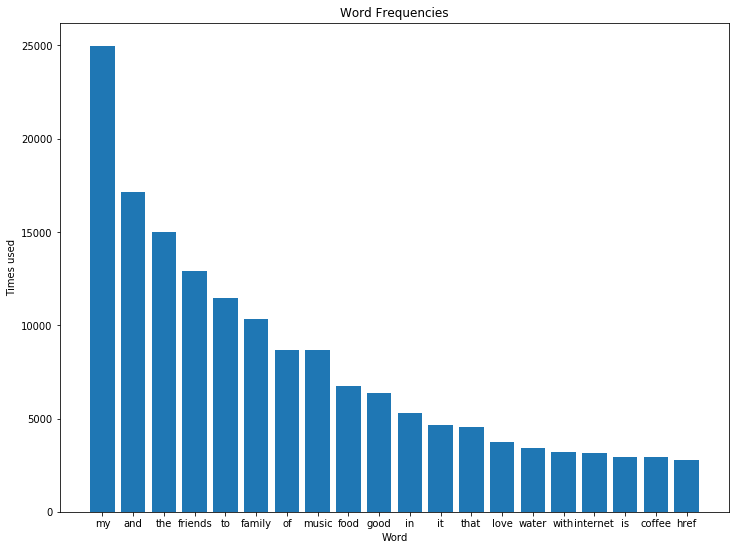

In [237]:
# Male essays for "6 things I could never do without"
print_most_frequently_used_words(df[df['sex'] == 'm']['essay5'].dropna().apply(lambda txt: txt.replace('<br />','')))

my :  22927
and :  13374
friends :  10657
the :  9618
family :  9359
to :  7184
music :  6058
of :  5668
good :  4621
in :  3946
food :  3901
love :  3662
that :  2872
it :  2859
water :  2631
coffee :  2603
books :  2312
laughter :  2217
with :  2199
things :  1869


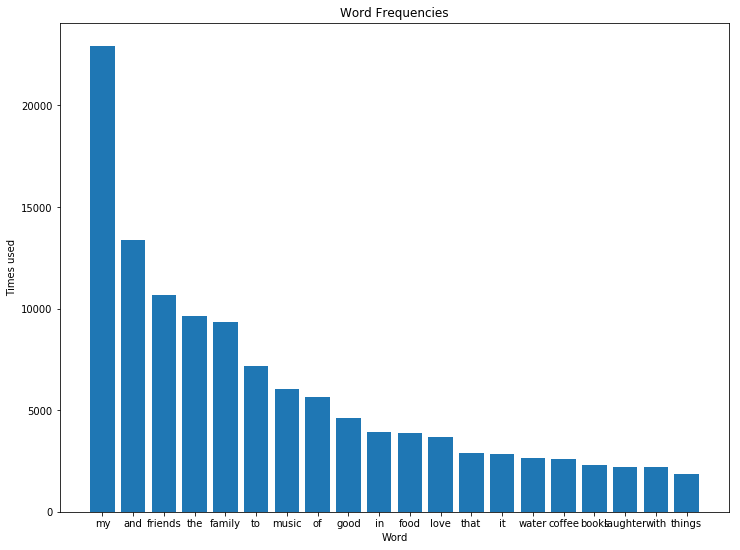

In [238]:
# Female essays for "6 things I could never do without"
print_most_frequently_used_words(df[df['sex'] == 'f']['essay5'].dropna().apply(lambda txt: txt.replace('<br />','')))

# Classification
We'll first use Naive Bayes and see how accurately it performs. Then we'll try a Support Vector Machine model, and lastly a K-Nearest-Neighbors model.


## Naive Bayes

In [167]:
# Use a Naive Bayes Classifier to make predictions
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
print(datetime.datetime.now())
classifier.fit(train_counts, train_labels)
predictions = classifier.predict(test_counts)
print(datetime.datetime.now())

2018-12-16 13:57:56.764973
2018-12-16 13:57:57.005236


### Evaluate the accuracy

In [164]:
from sklearn.metrics import accuracy_score
test_score = accuracy_score(test_labels, predictions)
print(test_score)

0.731442869057548


This indicates that the Naive Bayes classifier was correct about 76% of the time.

### Show a confusion matrix
This allows us to know correct/incorrect male and female counts. The following table layout demonstrates:

|     -     | M predicted | F predicted |
|-----------|-----------|-----------|
|Actual M's |                      |
|Actual F's |           |           |



In [169]:
from sklearn.metrics import confusion_matrix
def print_metrics(c_matrix):
    accuracy = (c_matrix[0][0] + c_matrix[1][1]) / (c_matrix[0][0] + c_matrix[0][1] + c_matrix[1][0] + c_matrix[1][1])
    precision = c_matrix[0][0] / (c_matrix[0][0] + c_matrix[0][1])
    recall = c_matrix[0][0] / (c_matrix[0][0] + c_matrix[1][0])
    f1 = 2*precision*recall/(precision+recall)
    print("confusion matrix: ", c_matrix)
    print("accuracy: ", accuracy)
    print("precision: ", precision)
    print("recall: ", recall)
    print("f1: ", f1)

c_matrix = confusion_matrix(test_labels, predictions)
print_metrics(c_matrix)

confusion matrix:  [[5505 1765]
 [1122 3598]]
accuracy:  0.7592160133444538
precision:  0.7572214580467675
recall:  0.8306926210955183
f1:  0.7922573217241131


Ability to guess males accurately: 78.5%

Ability to guess females accurately: 77.0%

## Support Vector Machine

(takes over 1 hour to execute)

In [104]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf', random_state=random_state, gamma='auto')
print(datetime.datetime.now())
classifier.fit(train_counts, train_labels)
predictions = classifier.predict(test_counts)
print(datetime.datetime.now())
test_score = accuracy_score(test_labels, predictions)
print(test_score)

/home/sbosshardt/.local/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6195162635529609


In [ ]:
c_matrix = confusion_matrix(test_labels, predictions)
print_metrics(c_matrix)

In [114]:
import datetime
print(datetime.datetime.now())

2018-12-13 20:36:21.695137


## K-Nearest Neighbors (Classifier)

In [176]:
from sklearn.neighbors import KNeighborsClassifier

print(datetime.datetime.now())

#scores = {}
#n_neighbors_to_try = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,75,100,125,150,175,200]
#n_neighbors_to_try = [225,250,275,300,325,350,375,400,500,600,700,800,900,1000]
#n_neighbors_to_try = [1200,1400,1600,1800,2000,2200,2400,2600,2800,3000]
n_neighbors_to_try = [500]
for n_neighbors in n_neighbors_to_try:
    classifier = KNeighborsClassifier(n_neighbors=n_neighbors)
    classifier.fit(train_counts, train_labels)
    predictions = classifier.predict(test_counts)
    scores[n_neighbors] = accuracy_score(test_labels, predictions)

print(datetime.datetime.now())
c_matrix = confusion_matrix(test_labels, predictions)
print_metrics(c_matrix)


2018-12-16 17:17:23.902065
2018-12-16 17:19:44.113610
confusion matrix:  [[6012 1258]
 [2880 1840]]
accuracy:  0.6548790658882402
precision:  0.8269601100412655
recall:  0.6761133603238867
f1:  0.743967330775894


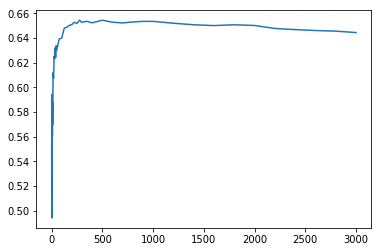

In [121]:
from matplotlib import pyplot as plt
plt.plot(scores.keys(), scores.values())

# Regression

We'll start off with multiple linear regression, followed by K-Nearest Neighbors.

## Multiple Linear Regression
We're predicting the person's sex, which is a classification task. That's not to say that we can't use regression to perform classification.

The sex column has two labels: 'm' and 'f'. We can map 'm' to 0 and 'f' to 1. We can round the predictions. For example, if a prediction is 0.2, we'll round to 0 (which classifies the result as male).

Observation: This model is multithreaded. During the computation, my computer's 8 CPU cores are at 100% usage. The classification processes I tried had only one thread at 100% usage, and most cores idle. Still, it takes a long time to fit the training set.


In [124]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(train_counts, train_labels)
predictions = mlr.predict(test_counts)

In [132]:
classified_predictions = [0 if prediction < 0.5 else 1 for prediction in predictions]
test_score = accuracy_score(test_labels, classified_predictions)
print(test_score)
confusion_matrix(test_labels, classified_predictions)

0.5271059216013344


array([[3912, 3358],
       [2312, 2408]])

In [170]:
# use the confusion matrix generated from an earlier run - avoid waiting over an hour.
c_matrix = [[3912, 3358], [2312, 2408]]
print_metrics(c_matrix)



confusion matrix:  [[3912, 3358], [2312, 2408]]
accuracy:  0.5271059216013344
precision:  0.538101788170564
recall:  0.62853470437018
f1:  0.5798132503334816


## K-Nearest Neighbors Regressor

In [172]:
print(datetime.datetime.now())
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(n_neighbors=500, weights="distance")
regressor.fit(train_counts, train_labels)
predictions = regressor.predict(test_counts)
print(datetime.datetime.now())

2018-12-16 17:10:39.786774
2018-12-16 17:12:58.188837


In [173]:
classified_predictions = [0 if prediction < 0.5 else 1 for prediction in predictions]
test_score = accuracy_score(test_labels, classified_predictions)
#print(test_score)
c_matrix = confusion_matrix(test_labels, classified_predictions)
print_metrics(c_matrix)

confusion matrix:  [[5981 1289]
 [2853 1867]]
accuracy:  0.6545454545454545
precision:  0.8226960110041266
recall:  0.6770432420194702
f1:  0.7427968206656732


In [174]:
from sklearn.neighbors import KNeighborsRegressor

print(datetime.datetime.now())

#scores = {}
#n_neighbors_to_try = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,500,600,700,800,900,1000,1200,1400,1600,1800,2000,2200,2400,2600,2800,3000]
n_neighbors_to_try = [500]
for n_neighbors in n_neighbors_to_try:
    regressor = KNeighborsRegressor(n_neighbors=n_neighbors, weights="distance")
    regressor.fit(train_counts, train_labels)
    predictions = regressor.predict(test_counts)
    classified_predictions = [0 if prediction < 0.5 else 1 for prediction in predictions]
    scores[n_neighbors] = accuracy_score(test_labels, classified_predictions)
    print(datetime.datetime.now(), " score: ", scores[n_neighbors])
#print(scores)
#print(confusion_matrix(test_labels, classified_predictions))
print(datetime.datetime.now())

2018-12-16 17:12:58.245259
2018-12-16 17:15:17.378413  score:  0.6545454545454545
2018-12-16 17:15:17.379510


confusion matrix:  [[5981 1289]
 [2853 1867]]
accuracy:  0.6545454545454545
precision:  0.8226960110041266
recall:  0.6770432420194702
f1:  0.7427968206656732


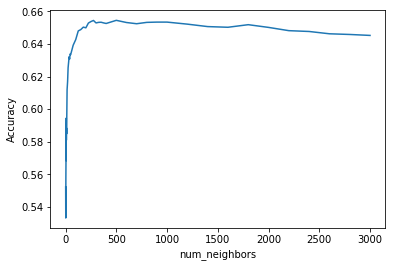

In [175]:
c_matrix = confusion_matrix(test_labels, classified_predictions)
print_metrics(c_matrix)

from matplotlib import pyplot as plt
plt.xlabel("num_neighbors")
plt.ylabel("Accuracy")
plt.plot(scores.keys(), scores.values())

In [37]:
#sample_essay_text = df['essay0'].values[0]
#print(sample_essay_text)
essay_cols = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']

demographics = ['sex']
word_lists = {}
for demographic in demographics:
    word_lists[demographic] = {}
    demog_values = df[demographic].unique()
    for demog_value in demog_values:
        word_lists[demographic][demog_value] = []
        #essays = df[df[demographic] == demog_value][essay_cols].values[0]
        #print(essays)
        essays_list = df[df[demographic] == demog_value][essay_cols].values
        print(len(essays_list))
        for essays in essays_list:
            word_list = get_essays_word_list(essays)
            word_lists[demographic][demog_value] += word_list
            

print(len(word_lists['sex']['m']))
print(len(word_lists['sex']['f']))


35829
24117
12668996
8814132


# Approach
1. Pre-process the data. (e.g. sanitising the text, tokenizing/counting/normalizing)
2. Run train_test_split on the data (80% training / 20% testing)
3. Use Naive Bayes and [Counter](https://docs.python.org/3/library/collections.html#collections.Counter) object

# Pre-processing functions

These functions parse and tokenize the text for later use.

In [57]:
from collections import Counter
import re

# Get rid of unwanted string data. Leave punctuation intact, but space it
# out in such a way that it won't interfere with word counts.
def format_essay_text(essay_text):
    # Replace <br /> with empty string
    new_text = essay_text.replace("<br />", "")
    # Replace &amp; with &
    new_text = new_text.replace("&amp;", "&")
    # Prepend space to punctuation characters that don't have a space
    # in front of them, and that are not followed by a word character
    # (e.g. leave "can't" alone)
    new_text = re.sub(r'((?!= )[^ \w](?=[^\w]))', r' \1', new_text)
    # Handle words that start with an opening parenthesis
    new_text = re.sub(r'( [(](?=\w))', r'\1 ', new_text)
    return new_text

# Given the (unformatted) essay text, run it through the formatter and
# tokenize it. Get the counts in the form of floats: 0 < x <= 1.0
def get_essay_text_frequencies(essay_text):
    formatted_essay_text = format_essay_text(essay_text)
    #print(essay_text)
    #print(formatted_essay_text)
    essay_tokens = formatted_essay_text.split()
    counter_int = Counter(essay_tokens)
    num_tokens = len(essay_tokens)
    num_unique_tokens = len(counter_int)
    most_frequent_token = next(iter(counter_int.most_common(1)))[0]
    #print("most frequent token: ", most_frequent_token)
    max_token_frequency = counter_int[most_frequent_token]
    #print("max token frequency: ", max_token_frequency)
    counter_normalized = {}
    #print(counter)
    for key in counter_int:
        counter_normalized[key] = counter_int[key] / max_token_frequency
    return counter_normalized


sample_essay_text = df['essay0'].values[0]
#modified_essay_text = format_essay_text(sample_essay_text)
text_frequencies = get_essay_text_frequencies(sample_essay_text)
print(text_frequencies)

{'about': 0.21052631578947367, 'me': 0.2631578947368421, ':': 0.15789473684210525, 'i': 0.42105263157894735, 'would': 0.10526315789473684, 'love': 0.21052631578947367, 'to': 0.6842105263157895, 'think': 0.05263157894736842, 'that': 0.05263157894736842, 'was': 0.05263157894736842, 'some': 0.15789473684210525, 'kind': 0.05263157894736842, 'of': 0.3157894736842105, 'intellectual': 0.05263157894736842, 'either': 0.05263157894736842, 'the': 0.3157894736842105, 'dumbest': 0.05263157894736842, 'smart': 0.05263157894736842, 'guy': 0.10526315789473684, ',': 0.3684210526315789, 'or': 0.05263157894736842, 'smartest': 0.05263157894736842, 'dumb': 0.05263157894736842, '.': 1.0, "can't": 0.05263157894736842, 'say': 0.05263157894736842, 'can': 0.05263157894736842, 'tell': 0.05263157894736842, 'difference': 0.05263157894736842, 'talk': 0.05263157894736842, 'ideas': 0.05263157894736842, 'and': 0.3157894736842105, 'concepts': 0.05263157894736842, 'forge': 0.05263157894736842, 'odd': 0.05263157894736842,